
# DenseNet DL Modeling on COVID-QU-Ex Dataset
In this notebook, we explore the application of an advanced image recognition model, DenseNet201, on the COVID-QU-Ex dataset available on Kaggle (https://www.kaggle.com/datasets/anasmohammedtahir/covidqu). Our goal is to leverage DenseNet201's powerful features for enhancing COVID-19 image classification tasks.

## PART 1: Analyses on images

## Data Preparation and Analysis
- Data Loading: We'll start by defining a function to import the dataset directly from Kaggle into our working environment. This process ensures that our analysis is reproducible and streamlined.
- Image Visualization: Initial data exploration will involve displaying raw images from the dataset alongside their CLAHE (Contrast Limited Adaptive Histogram Equalization) enhanced versions. This step is crucial for understanding the potential improvements in image quality and clarity brought by CLAHE preprocessing.
## Model Setup and Training
- Model Importation and Configuration: We will import the DenseNet201 model from Keras, configuring it for our specific needs. The model will undergo fine-tuning to better adapt to the characteristics of our dataset.
- Training and Validation: The adjusted model will be trained using the training subset and its performance will be monitored on a validation set. This phase is vital for iterative model improvement and tuning.
## Model Evaluation
- Testing: After training, the model's effectiveness will be assessed using a separate test dataset. This step helps in evaluating the real-world applicability of our model.
- Grad-CAM Analysis: To gain deeper insights into the decision-making processes of our model, we will employ Gradient-weighted Class Activation Mapping (Grad-CAM). This technique visualizes the areas in the images that significantly influence the model’s predictions, offering an intuitive explanation of its behavior.



## PART 2: Analyses on masked images
By focusing on masked images, we aim to enhance the model's ability to concentrate on clinically relevant features within the images, potentially improving diagnostic accuracy and robustness. This part will critically analyze the impact of image masking on model performance, providing valuable insights into the benefits and limitations of this approach.
## Data Preparation and Analysis
- Apply Masks: Utilizing the previously defined data loading functions, we will retrieve both the original images and their corresponding masks. The masks will be applied to the original images to generate masked versions.
- Visualizing Masked Images: To ensure that our masking process is correctly performed, we will visualize a subset of the original images alongside their masks and the resulting masked images. This step not only verifies the process but also provides insight into how the model's input will be altered by masking.
Similar to our initial data preparation phase, the masked images will be normalized to ensure model training consistency.
## Model Setup and Training
- Model : Model build above will also be used here, applied to masled images datasets.
- Training and Validation: The adjusted model will be trained using the training subset and its performance will be monitored on a validation set. This phase is vital for iterative model improvement and tuning.
## Model Evaluation
- Testing: Here again, after training, the model's effectiveness will be assessed using a separate test dataset. This step helps in evaluating the real-world applicability of our model.
- Grad-CAM Analysis: To gain deeper insights into the decision-making processes of our model, we will employ Gradient-weighted Class Activation Mapping (Grad-CAM). This technique visualizes the areas in the images that significantly influence the model’s predictions, offering an intuitive explanation of its behavior.

By the end of this notebook, we aim to achieve a robust understanding of how DenseNet201 can be optimized for better performance in diagnosing COVID-19 from X-ray images, providing valuable tools for medical professionals in the fight against this pandemic.

# REFERENCES
[1] A. M. Tahir, M. E. H. Chowdhury, A. Khandakar, Y. Qiblawey, U. Khurshid, S. Kiranyaz, N. Ibtehaz, M. S. Rahman, S. Al-Madeed, S. Mahmud, M. Ezeddin, K. Hameed, and T. Hamid, “COVID-19 Infection Localization and Severity Grading from Chest X-ray Images”, Computers in Biology and Medicine, vol. 139, p. 105002, 2021, https://doi.org/10.1016/j.compbiomed.2021.105002.     \
[2] Anas M. Tahir, Muhammad E. H. Chowdhury, Yazan Qiblawey, Amith Khandakar, Tawsifur Rahman, Serkan Kiranyaz, Uzair Khurshid, Nabil Ibtehaz, Sakib Mahmud, and Maymouna Ezeddin, “COVID-QU-Ex .” Kaggle, 2021, https://doi.org/10.34740/kaggle/dsv/3122958. \
[3] T. Rahman, A. Khandakar, Y. Qiblawey A. Tahir S. Kiranyaz, S. Abul Kashem, M. Islam, S. Al Maadeed, S. Zughaier, M. Khan, M. Chowdhury, "Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-rays Images," Computers in Biology and Medicine, p. 104319, 2021, https://doi.org/10.1016/j.compbiomed.2021.104319. \
[4] A. Degerli, M. Ahishali, M. Yamac, S. Kiranyaz, M. E. H. Chowdhury, K. Hameed, T. Hamid, R. Mazhar, and M. Gabbouj, "Covid-19 infection map generation and detection from chest X-ray images," Health Inf Sci Syst 9, 15 (2021), https://doi.org/10.1007/s13755-021-00146-8. \
[5] M. E. H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M. A. Kadir, Z. B. Mahbub, K. R. Islam, M. S. Khan, A. Iqbal, N. A. Emadi, M. B. I. Reaz, M. T. Islam, "Can AI Help in Screening Viral and COVID-19 Pneumonia?," IEEE Access, vol. 8, pp. 132665-132676, 2020, https://doi.org/10.1109/ACCESS.2020.3010287.

In [1]:
# Checking if GPU is activated
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2024-05-21 06:40:22.732629: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 06:40:22.732725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 06:40:22.871670: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
# Cell to import necessary library
import numpy as np
import pandas as pd
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn import metrics

import os
%matplotlib inline

In [ ]:
# Cell to clean directory from previous test files or useless files:

#import shutil
#shutil.rmtree('/kaggle/working/COVID-EX-Qu-dataset/Models')
#os.remove('/kaggle/working/COVID-EX-Qu-dataset/Models/my_model.h5')

## 1- Data analysis

In [3]:
# This cells is made to set the different directories used in this notebook
groups = ['COVID-19', 'Normal', 'Non-COVID']
sets = ['Val', 'Test', 'Train']
# Define base pat
base_path = '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data'
destination_path = '/kaggle/working/COVID-EX-Qu-dataset'
destination_path_masked = '/kaggle/working/COVID-EX-Qu-dataset_MASKED'

In [ ]:
# Only run this cell if working files are not in kaggle working directory
'''import shutil
for sett in sets:
  for group in groups:
    ima_dir = os.path.join(base_path, sett, group)
    for dos in tqdm(os.listdir(ima_dir)):
        if dos=="images":
            shutil.copytree(os.path.join(ima_dir, dos), os.path.join(destination_path, sett, group, dos))'''

In [4]:
# Checking data integrity after Kaggle input to output directory
n_covid = 0
n_noncovid = 0
n_normal = 0
#----Reference number from COVID-EX-qu Kaggle------------
ref_covid = 11956
ref_noncovid = 11263
ref_normal = 10701
#-------------------------------------------------------
for sett in sets:
  for group in groups:
    ima_dir = os.path.join(destination_path, sett, group)
    for dos in os.listdir(ima_dir):
      num = len(os.listdir(os.path.join(ima_dir, dos)))
      print(f"In the set {sett}, there are {num} {dos} of {group}")
      if group =="COVID-19" and dos=='images':
        n_covid += len(os.listdir(os.path.join(ima_dir, dos)))
      if group =="Non-COVID" and dos=='images':
        n_noncovid += len(os.listdir(os.path.join(ima_dir, dos)))
      if group =="Normal" and dos=='images':
        n_normal += len(os.listdir(os.path.join(ima_dir, dos)))

print(f"\nThere are {n_covid} COVID images found, {n_covid/ref_covid *100}% of the original dataset from Kaggle.")
print(f"There are {n_noncovid} non-COVID images, {n_noncovid/ref_noncovid *100}% of the original dataset from Kaggle.")
print(f"There are {n_normal} normal images, {n_normal/ref_normal *100}% of the original dataset from Kaggle.")

In the set Val, there are 1903 images of COVID-19
In the set Val, there are 1712 images of Normal
In the set Val, there are 1802 images of Non-COVID
In the set Test, there are 2395 images of COVID-19
In the set Test, there are 2140 images of Normal
In the set Test, there are 2253 images of Non-COVID
In the set Train, there are 7658 images of COVID-19
In the set Train, there are 6849 images of Normal
In the set Train, there are 7208 images of Non-COVID

There are 11956 COVID images found, 100.0% of the original dataset from Kaggle.
There are 11263 non-COVID images, 100.0% of the original dataset from Kaggle.
There are 10701 normal images, 100.0% of the original dataset from Kaggle.


In [5]:
def preprocessing_viz (endpoint):
        # Visual test of the future preprocessing:
    # Evaluation of the CLAHE performance

    sett = random.choice(sets)
    group = random.choice(groups)

    directory_path = os.path.join(destination_path, sett, group, 'images')

    files = os.listdir(directory_path)
    random_file = random.choice(files)

    image_path = os.path.join(directory_path, random_file)

    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # Apply CLAHE
    clahe_image = clahe.apply(gray_image)
    # Create a new figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Display the original image in the first subplot
    axes[0].imshow(gray_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display the CLAHE-enhanced image in the second subplot
    axes[1].imshow(cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB))
    axes[1].set_title('CLAHE Enhanced Image')
    axes[1].axis('off')
    plt.show()

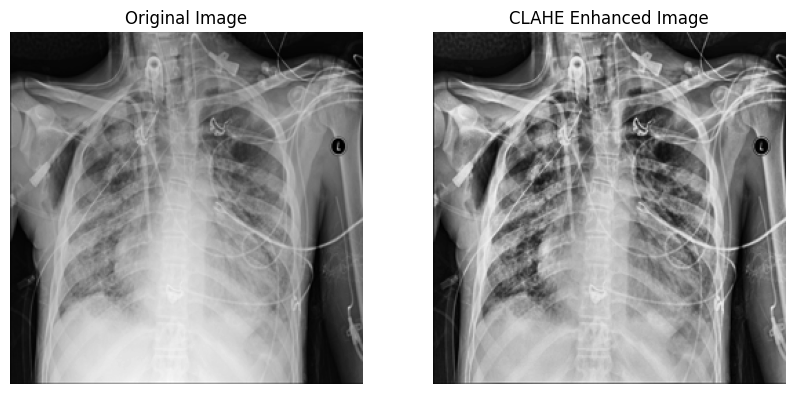

In [6]:
preprocessing_viz ('images')

# 2- Data preparation

In [7]:
# Implementation of the CLAHE preprocessing:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_image(img):
    # Check if image is RGB and convert to grayscale
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Ensure image is of type uint8 for CLAHE
    img = img.astype('uint8')
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    
    # Convert grayscale back to RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Normalize the image to [0, 1]
    img = img.astype('float32') / 255.0
    
    return img

# Data generators with the custom preprocessing function
train_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)

In [8]:
# Preparation of the data set using image generator
batch_size = 32
train_generator = train_data_generator.flow_from_directory(directory=os.path.join(destination_path, 'Train'),
                                                           class_mode="sparse",
                                                           target_size=(224, 224),
                                                           batch_size=batch_size)

val_generator = val_data_generator.flow_from_directory(directory=os.path.join(destination_path, 'Val'),
                                                         class_mode="sparse",
                                                         target_size=(224, 224),
                                                         batch_size=batch_size)

test_generator = test_data_generator.flow_from_directory(directory=os.path.join(destination_path, 'Test'),
                                                          class_mode="sparse",
                                                          target_size=(224, 224),
                                                          batch_size=batch_size, shuffle=False)
# shuffle=False argument is very important for model evaluation

Found 21715 images belonging to 3 classes.
Found 5417 images belonging to 3 classes.
Found 6788 images belonging to 3 classes.


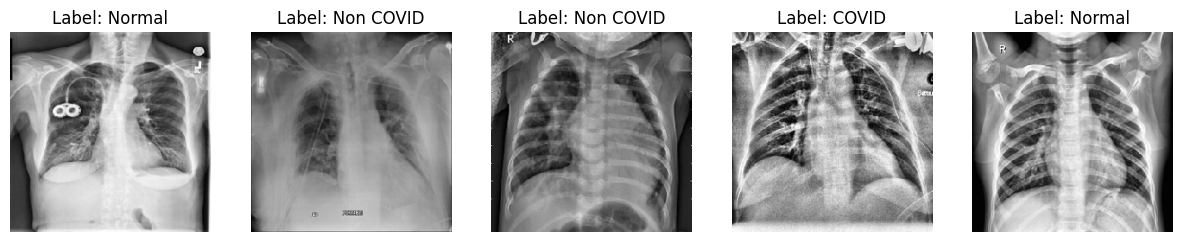

In [9]:
# Visual check of images in generators:

class_names = {
    0: 'COVID',
    1: 'Non COVID',
    2: 'Normal'
}
# Function to visualize images from a batch
def visualize_images(image_batch, label_batch, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(image_batch[i])
        plt.title(f"Label: {class_names[label_batch[i]]}")
        plt.axis('off')
    plt.show()

# Retrieve a batch of images and labels from the generator
train_generator.reset()
batch_images, batch_labels = train_generator[1]

# Visualize the batch of images
visualize_images(batch_images, batch_labels)

# 3- DenseNet Model
The architecture of our model is based on a DenseNet201.

In [10]:
#Main architecture of the model
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model():
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False
    for layer in base_model.layers[137:]: # Comment line if not fine tuned
        layer.trainable = True            # Comment line if not fine tuned

    # Add custom classifier layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [11]:
# Model
Model_DNet = build_model()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Checking of model layers
Model_DNet.summary()

In [13]:
# Definition of callbacks:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_learning_rate = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3, #si val_loss stagne sur 3 epochs consécutives selon la valeur min_delta
                                    min_delta= 0.01,
                                    factor=0.1,  # On réduit le learning rate d'un facteur 0.1
                                    cooldown = 4, # On attend 4 epochs avant de réitérer 
                                    verbose=1)

In [14]:
# MODEL TRAINING:
nb_img_train = train_generator.samples
nb_img_val = val_generator.samples
history_densenet = Model_DNet.fit(train_generator, 
                                epochs = 30,
                                steps_per_epoch = nb_img_train//batch_size,
                                validation_data=val_generator,
                                validation_steps=nb_img_val//batch_size,
                                callbacks = [reduce_learning_rate]
                                )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716273985.068595     135 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716273985.342712     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


570/678 ━━━━━━━━━━━━━━━━━━━━ 1:10 650ms/step - accuracy: 0.8194 - loss: 0.4610

W0000 00:00:1716274355.478185     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8264 - loss: 0.4444

W0000 00:00:1716274411.943843     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 724s 660ms/step - accuracy: 0.8264 - loss: 0.4442 - val_accuracy: 0.9196 - val_loss: 0.2170 - learning_rate: 0.0010
Epoch 2/30
  1/678 ━━━━━━━━━━━━━━━━━━━━ 3:44 331ms/step - accuracy: 0.8750 - loss: 0.4310

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


678/678 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8750 - loss: 0.4310 - val_accuracy: 1.0000 - val_loss: 0.0761 - learning_rate: 0.0010
Epoch 3/30


W0000 00:00:1716274458.059961     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 257s 378ms/step - accuracy: 0.9055 - loss: 0.2481 - val_accuracy: 0.7905 - val_loss: 0.7952 - learning_rate: 0.0010
Epoch 4/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.9375 - loss: 0.1404 - val_accuracy: 0.7778 - val_loss: 0.3973 - learning_rate: 0.0010
Epoch 5/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9220 - loss: 0.2125
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
678/678 ━━━━━━━━━━━━━━━━━━━━ 257s 377ms/step - accuracy: 0.9220 - loss: 0.2125 - val_accuracy: 0.8844 - val_loss: 0.3667 - learning_rate: 0.0010
Epoch 6/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 0.9062 - loss: 0.1527 - val_accuracy: 1.0000 - val_loss: 0.0835 - learning_rate: 1.0000e-04
Epoch 7/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 257s 377ms/step - accuracy: 0.9414 - loss: 0.1574 - val_accuracy: 0.9464 - val_loss: 0.1551 - learning_rate: 1.0000e-04
Epoch 8/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.9375 

In [15]:
# Loss and accuracy analysis during training
def plot_model_history (history):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss by epoch')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='right')

    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc by epoch')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='right')
    plt.show()

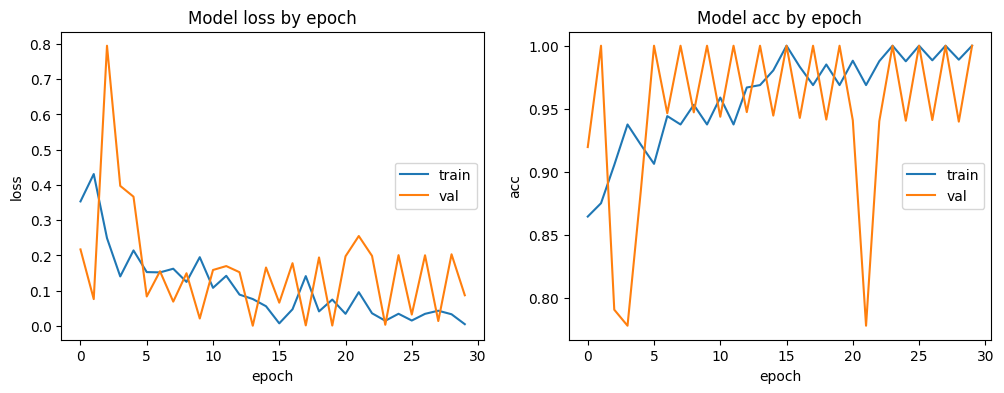

In [16]:
plot_model_history(history_densenet)

## 5- RESULTS

In [11]:
from tensorflow.keras.models import load_model
Model_DNet_m = load_model('/kaggle/working/Model_DNet_m_unfreezed.h5')
Model_DNet = load_model('/kaggle/working/Model_DNet_unfreezed.h5')

In [ ]:
Model_DNet.load_weights('/kaggle/working/DNet_B_v0_image_freezed.weights.h5')

In [17]:
# Model evaluation on test generator data
evaluation = Model_DNet.evaluate(test_generator)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

213/213 ━━━━━━━━━━━━━━━━━━━━ 49s 231ms/step - accuracy: 0.9742 - loss: 0.1017
Test Loss: 0.1500263661146164
Test Accuracy: 0.9590453505516052


W0000 00:00:1716278307.967993     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  2/213 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step  

W0000 00:00:1716278331.501498     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


213/213 ━━━━━━━━━━━━━━━━━━━━ 58s 195ms/step


W0000 00:00:1716278372.809328     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2395
           1       0.94      0.96      0.95      2253
           2       0.95      0.93      0.94      2140

    accuracy                           0.96      6788
   macro avg       0.96      0.96      0.96      6788
weighted avg       0.96      0.96      0.96      6788



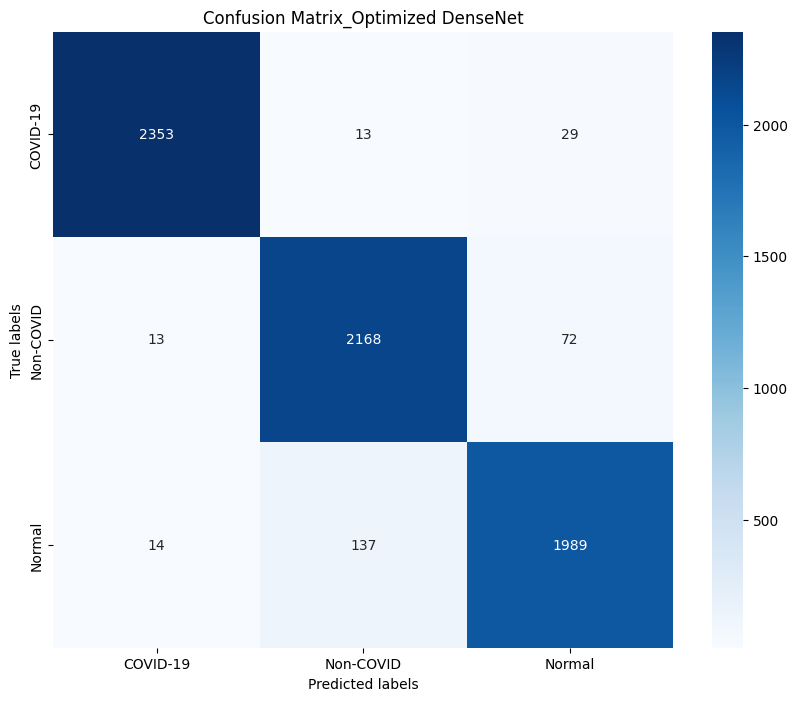

In [18]:
# Confusion_ matrix:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test data
predictions = Model_DNet.predict(test_generator)
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
# Get the true classes
true_classes = test_generator.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_Optimized DenseNet')
plt.show()

In [19]:
# Visualization of results on images from test_generator data:
class_names = {
    0: 'COVID',
    1: 'Non COVID',
    2: 'Normal'
}

# Function to apply the model on a batch of images and visualize the results
def apply_model_and_visualize_multiple_images(model, data_generator, num_images=12):
    plt.figure(figsize=(15, 15))
    data_generator.reset()
    
    for i in range(num_images):
        # Retrieve one image and its label from the generatorl 
        batch_images, batch_labels = random.choice(data_generator)
        image = batch_images[0]  # Take the first image from the batch
        label = round(batch_labels[0])  # Corresponding label
        
        # Reshape the image to (1, height, width, channels) for model prediction
        image = np.expand_dims(image, axis=0)
        
        # Apply the trained model to obtain prediction
        prediction = model.predict(image)
        
        # Round the predicted label to the nearest integer
        predicted_label = np.argmax(prediction)
        
        # Convert integer labels to class names
        true_class_name = class_names[label]
        predicted_class_name = class_names[predicted_label]
        
        # Visualize the result
        plt.subplot(4, 3, i+1)
        plt.imshow(image[0])
        
        # Determine title color based on whether true and predicted labels match
        title_color = 'green' if true_class_name == predicted_class_name else 'red'
        
        plt.title(f"True Label: {true_class_name}\nPredicted Label: {predicted_class_name}", color=title_color)
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


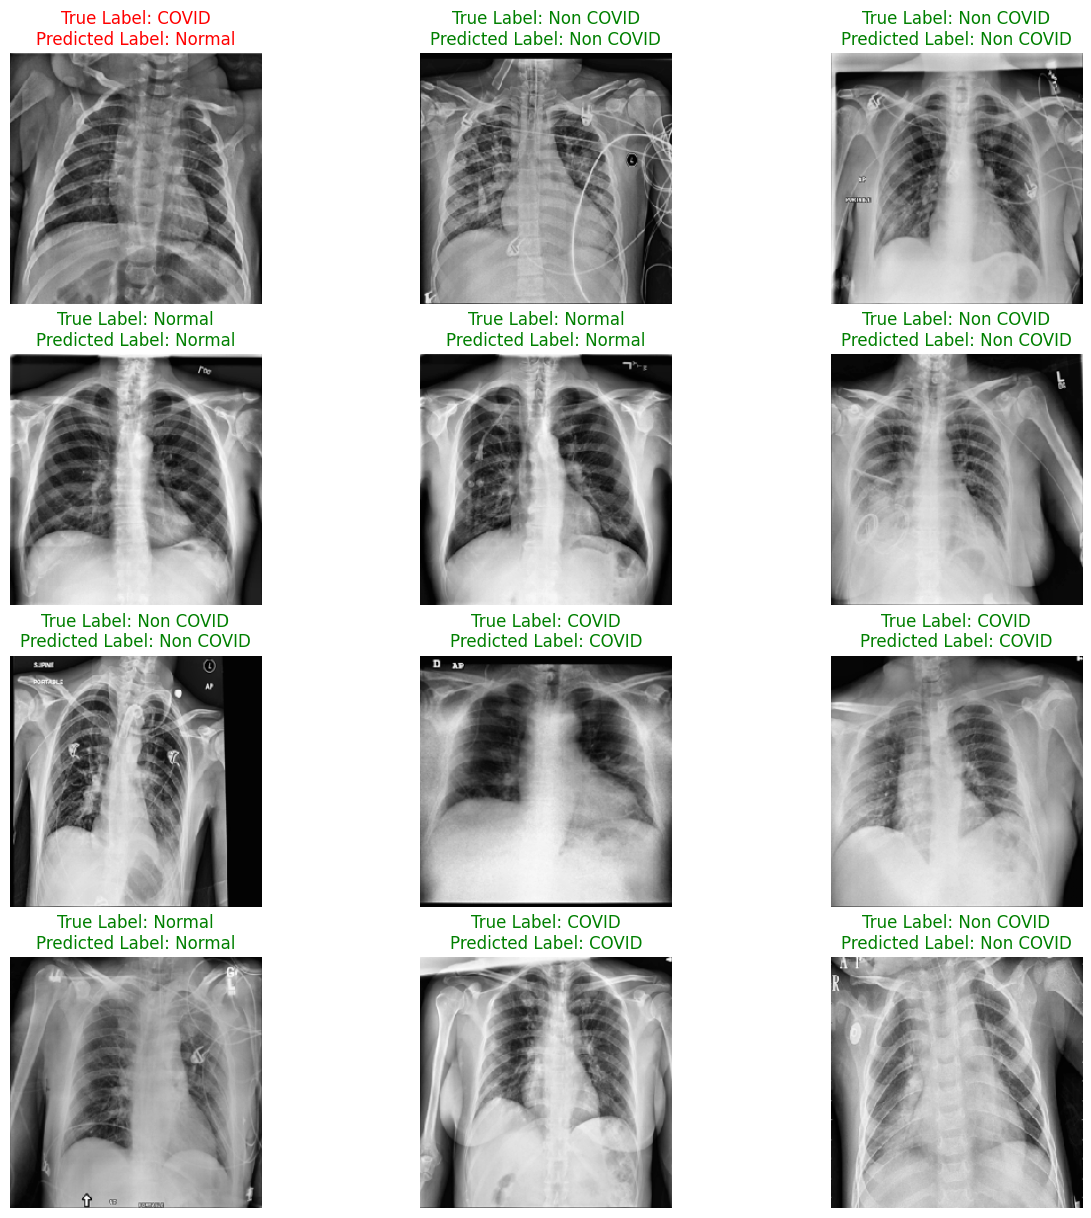

In [20]:
# Example usage for applying the model on multiple images from the validation set
apply_model_and_visualize_multiple_images(Model_DNet, test_generator, num_images=12)

# 6- GRAD-Cam analyses
As we need to understand how the model is classifiyng images, a grad-cam analyzes is performed.

In [21]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(inputs = model.input, outputs = [model.get_layer(last_conv_layer_name).output, model.output])

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [22]:
def plot_gradcam_results (model, data, model_layer, num_image=10):
    model.layers[-1].activation = None
    for i in range(num_image):
        batch_images, batch_labels = random.choice(data)
        batch_image = batch_images[:num_image]  # Take the first image from the batch
        batch_label = batch_labels[:num_image]  # Corresponding label
        img_array = batch_image[i]
        image = np.expand_dims(img_array, axis=0)

        # Make the prediction
        prediction = model.predict(image)

        # Create the heatmap
        heatmap = make_gradcam_heatmap(image, model, model_layer)

        # Resize the heatmap to the original image size
        heatmap = tf.expand_dims(heatmap, axis=-1)  # Add an extra channel dimension
        heatmap = tf.image.resize(heatmap, (img_array.shape[0], img_array.shape[1]))

        # Convert the heatmap to numpy array
        heatmap = heatmap.numpy()
        heatmap = np.abs(heatmap-1) # Red and blue are reversed, probably because cv2 and tensorflow dont use the same default colors - This will make them appear as I want

        # Normalize the heatmap
        heatmap = np.uint8(255 * heatmap)

        # Apply colormap (jet or any other)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Convert heatmap to float32 and scale to [0, 1]
        heatmap = heatmap.astype(np.float32) / 255

        # Superimpose both images
        superimposed_img = cv2.addWeighted(img_array, 0.5, heatmap, 0.5, 0)

        # Get predicted and true labels
        true_label = batch_label[i]
        true_class_name = class_names[true_label]
        predicted_label = np.argmax(prediction[0])
        predicted_class_name = class_names[predicted_label]

        title_color = 'green' if true_label == predicted_label else 'red'

        # Plot the original image and the Grad-CAM heatmap
        plt.figure(figsize=(15, 5))
        plt.suptitle('Image {} - Predicted label: {} | True label: {}'.format(i+1, predicted_class_name, true_class_name), fontsize=16, x=0.5, y=0.98, horizontalalignment='right', color=title_color)
        plt.subplot(1, 2, 1)
        plt.imshow(img_array)
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(superimposed_img)
        plt.title('Grad-CAM Heatmap')
        plt.axis('off')

        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


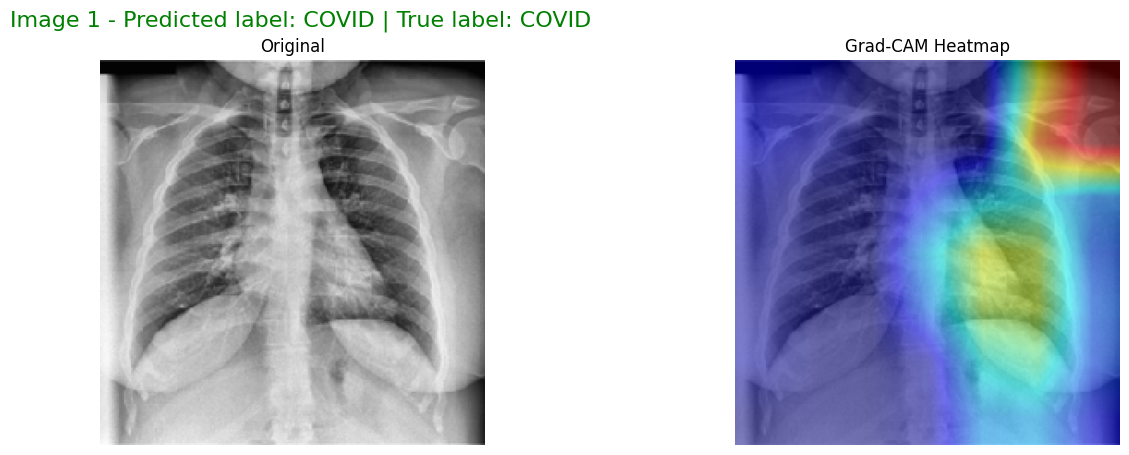

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


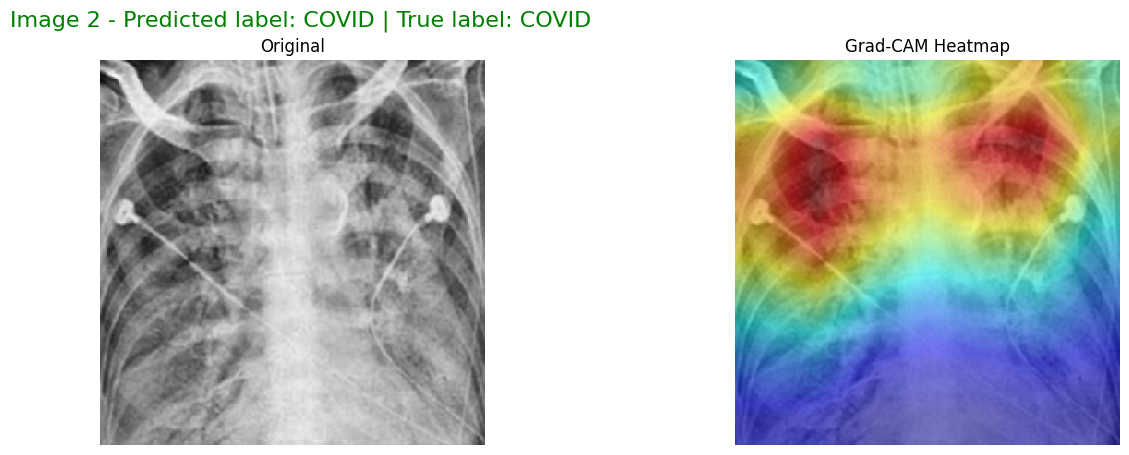

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


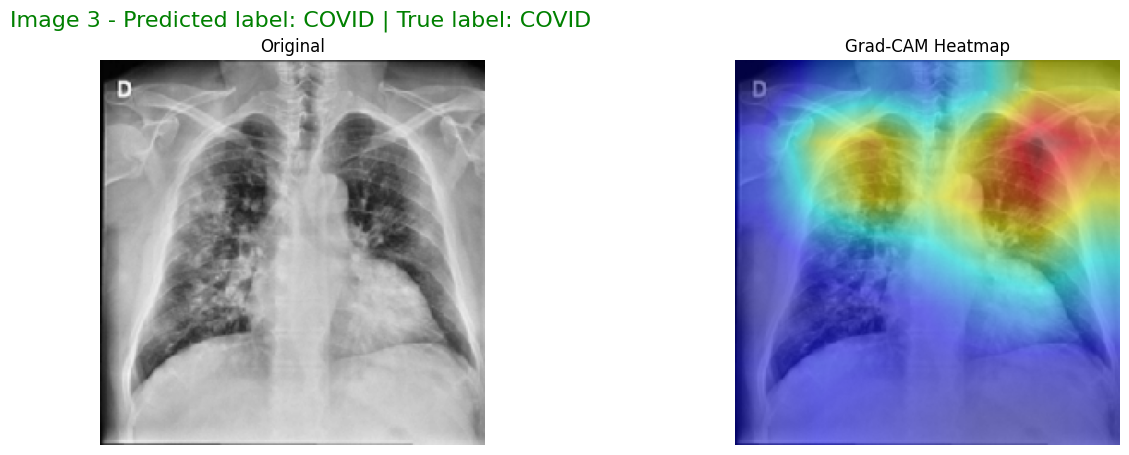

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


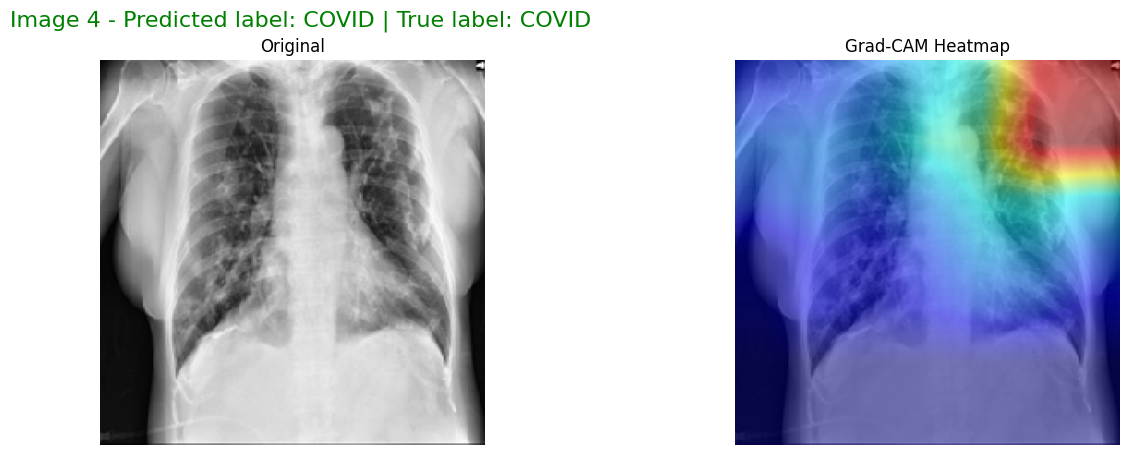

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


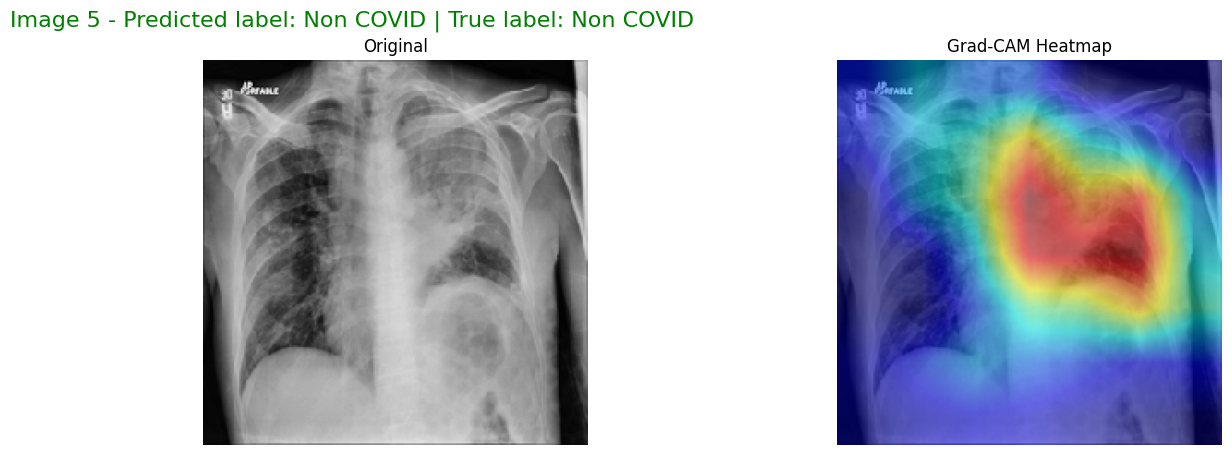

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


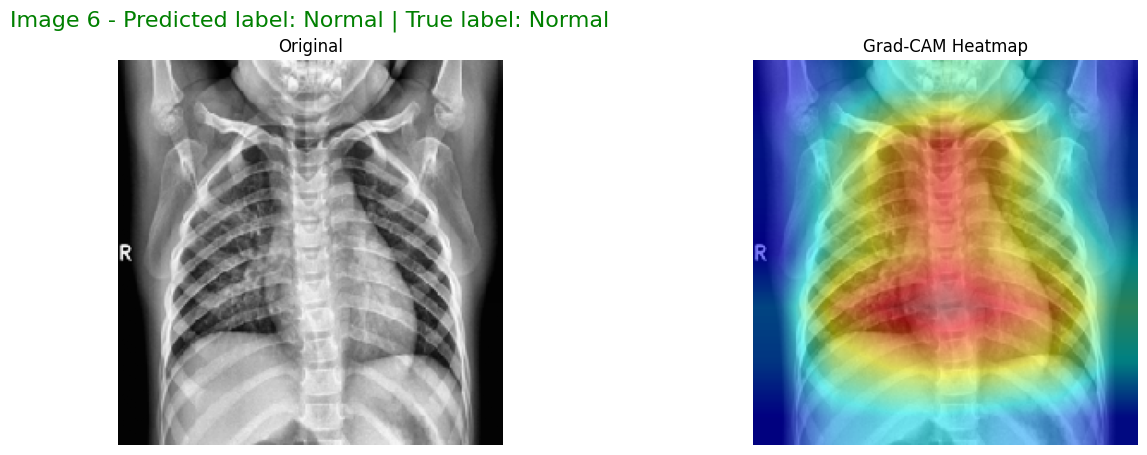

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


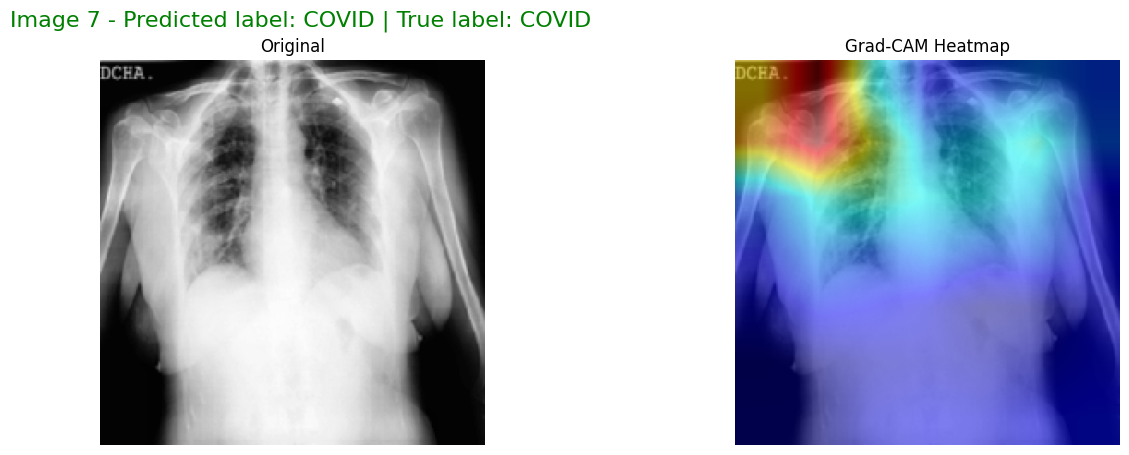

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


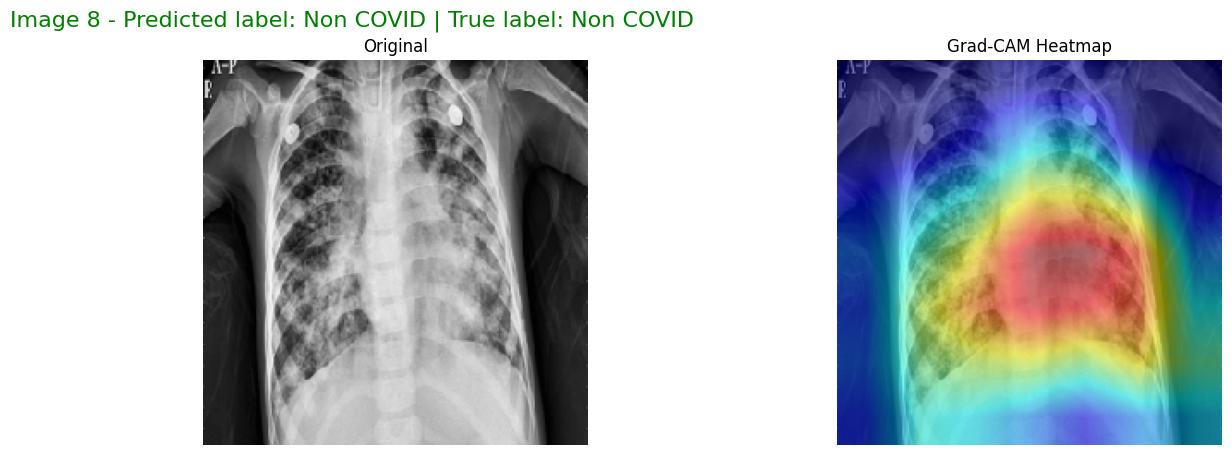

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


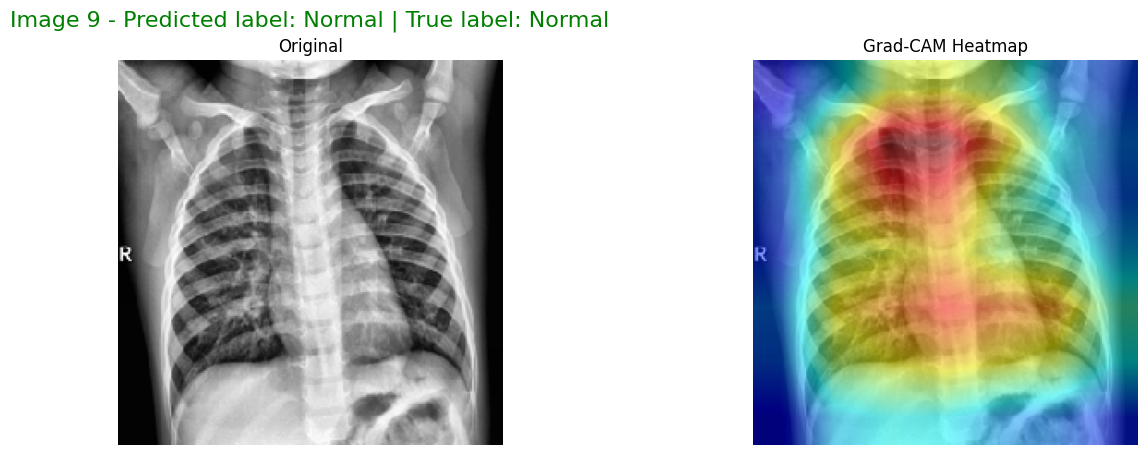

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


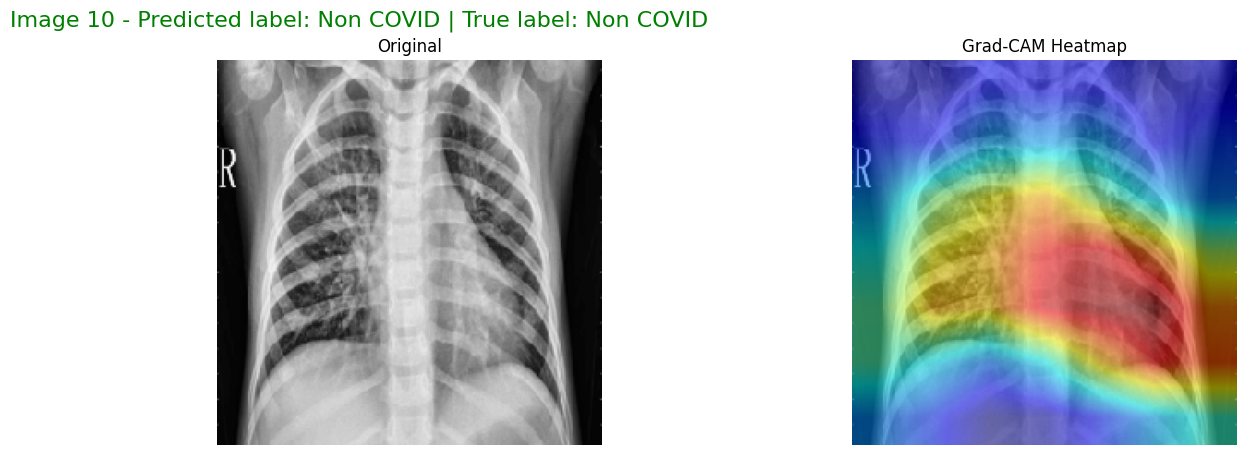

In [23]:
plot_gradcam_results (Model_DNet, test_generator, 'conv5_block32_concat')

Analysis of model not tuned for parformed in prior to fine-tuning (see architecture section and comment on freezing layers)
Fine-tuning the model increase accuracy of 6% (from 90% to 96%)

A fine-tuned DenseNet201 model provides good results during inference.
Overall, the Grad-CAM offers a valuable interpretation of the model, as it primarily focuses on the chest region for classification. However, we observe that it sometimes exhibits bias due to certain annotations or artifacts, resulting in interpretations that are not entirely neutral from a medical point of view. In the next chapter, I will apply a similar model to masked images to mitigate this issue.



# 7- Analysis with MASKED IMAGES

In [25]:
Model_DNet_m = build_model()
# If model weights were saved in previous session, un-comment following commande:
#Model_DNet_m.load_weights('/kaggle/working/DNet_B_v0_masked_freezed.weights.h5')

In [ ]:
#During 1st session or if persistance was not set to "Files...", un-comment following lines:
'''for sett in sets:
  for group in groups:
    
    image_folder = os.path.join(base_path, sett, group, 'images')
    masks_folder = os.path.join(base_path, sett, group, 'lung masks')
    output_dir = os.path.join(destination_path_masked, sett, group, 'masked images')
   
    os.makedirs(output_dir, exist_ok=True)

    images = sorted(os.listdir(image_folder))

    for image_name in tqdm(images):
        img_path = os.path.join(image_folder, image_name)
        mask_path = os.path.join(masks_folder, image_name)  # Assuming mask names are the same as image names

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        masked_image = cv2.bitwise_and(img, img, mask=mask)

        output_path = os.path.join(output_dir, f'masked_{image_name[:-4]}.png')  # Save as PNG
        
        cv2.imwrite(output_path, masked_image)

    print(f"{sett} {group} masked images saved successfully.")''

In [26]:
# Preparation of the data set using image generator on masked images
batch_size = 32
train_generator_m = train_data_generator.flow_from_directory(directory=os.path.join(destination_path_masked, 'Train'),
                                                           class_mode="sparse",
                                                           target_size=(224, 224),
                                                           batch_size=batch_size)

val_generator_m = val_data_generator.flow_from_directory(directory=os.path.join(destination_path_masked, 'Val'),
                                                         class_mode="sparse",
                                                         target_size=(224, 224),
                                                         batch_size=batch_size)

test_generator_m = test_data_generator.flow_from_directory(directory=os.path.join(destination_path_masked, 'Test'),
                                                          class_mode="sparse",
                                                          target_size=(224, 224),
                                                          batch_size=batch_size, shuffle=False)
# shuffle=False argument is very important for model evaluation

Found 21715 images belonging to 3 classes.
Found 5417 images belonging to 3 classes.
Found 6788 images belonging to 3 classes.


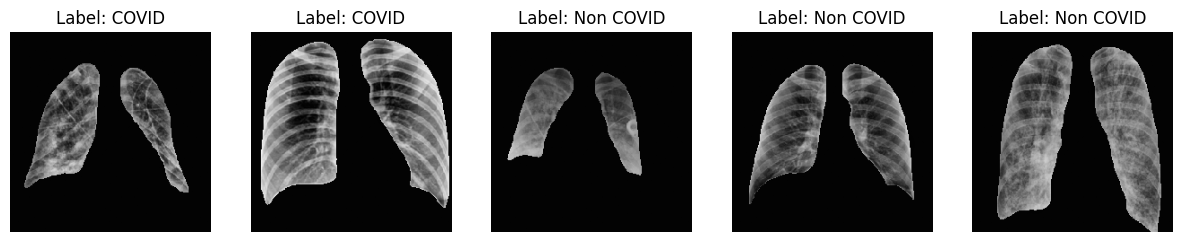

In [27]:
# Visual check of images in generators:

# Retrieve a batch of images and labels from the generator
train_generator_m.reset()
batch_images, batch_labels = train_generator_m[1]

# Visualize the batch of images
visualize_images(batch_images, batch_labels)

In [28]:
#Training of the model of masked images
nb_img_train = train_generator_m.samples
nb_img_val = val_generator_m.samples
history_densenet_m = Model_DNet_m.fit(train_generator_m, 
                                epochs = 30,
                                steps_per_epoch = nb_img_train//batch_size,
                                validation_data=val_generator_m,
                                validation_steps=nb_img_val//batch_size,
                                callbacks = [reduce_learning_rate]
                                )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
W0000 00:00:1716278710.792896     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


382/678 ━━━━━━━━━━━━━━━━━━━━ 3:00 611ms/step - accuracy: 0.7085 - loss: 0.7061

W0000 00:00:1716278943.587072     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.7335 - loss: 0.6549

W0000 00:00:1716279062.308304     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 558s 549ms/step - accuracy: 0.7336 - loss: 0.6547 - val_accuracy: 0.8131 - val_loss: 0.5287 - learning_rate: 0.0010
Epoch 2/30
  1/678 ━━━━━━━━━━━━━━━━━━━━ 3:54 346ms/step - accuracy: 0.8125 - loss: 0.3593

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


678/678 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8125 - loss: 0.3593 - val_accuracy: 0.7778 - val_loss: 0.2477 - learning_rate: 0.0010
Epoch 3/30


W0000 00:00:1716279092.191735     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 255s 375ms/step - accuracy: 0.8188 - loss: 0.4518 - val_accuracy: 0.7633 - val_loss: 0.6288 - learning_rate: 0.0010
Epoch 4/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.8750 - loss: 0.3528 - val_accuracy: 0.8889 - val_loss: 0.2229 - learning_rate: 0.0010
Epoch 5/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 255s 374ms/step - accuracy: 0.8469 - loss: 0.3984 - val_accuracy: 0.4614 - val_loss: 2.5239 - learning_rate: 0.0010
Epoch 6/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 0.8125 - loss: 0.4161 - val_accuracy: 0.5556 - val_loss: 2.3339 - learning_rate: 0.0010
Epoch 7/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8624 - loss: 0.3584
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
678/678 ━━━━━━━━━━━━━━━━━━━━ 255s 374ms/step - accuracy: 0.8624 - loss: 0.3584 - val_accuracy: 0.5862 - val_loss: 1.3187 - learning_rate: 0.0010
Epoch 8/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.9062 - loss: 

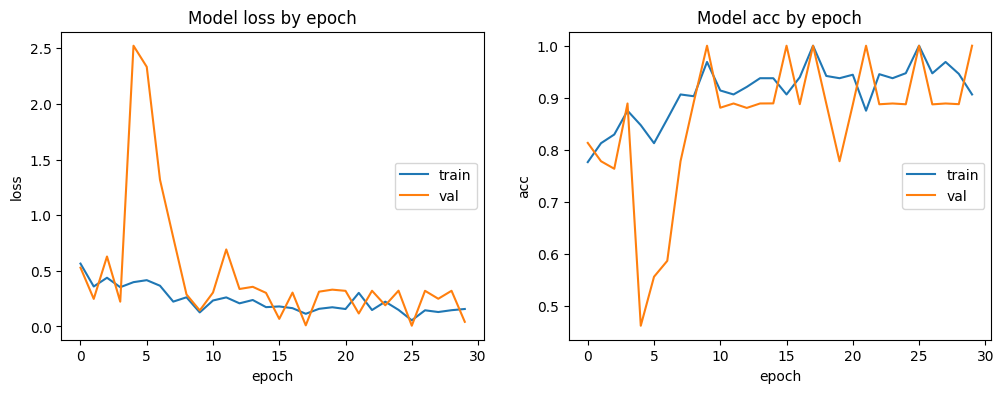

In [29]:
# Loss and accuracy analysis during training

plot_model_history(history_densenet_m)

In [30]:
# Model evaluation on test generator data
evaluation = Model_DNet_m.evaluate(test_generator_m)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

213/213 ━━━━━━━━━━━━━━━━━━━━ 36s 168ms/step - accuracy: 0.9097 - loss: 0.2686
Test Loss: 0.27632564306259155
Test Accuracy: 0.9107248187065125


W0000 00:00:1716282889.634029     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  2/213 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step

W0000 00:00:1716282931.224821     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


213/213 ━━━━━━━━━━━━━━━━━━━━ 55s 187ms/step


W0000 00:00:1716282970.827151     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2395
           1       0.91      0.92      0.91      2253
           2       0.89      0.92      0.90      2140

    accuracy                           0.91      6788
   macro avg       0.91      0.91      0.91      6788
weighted avg       0.91      0.91      0.91      6788



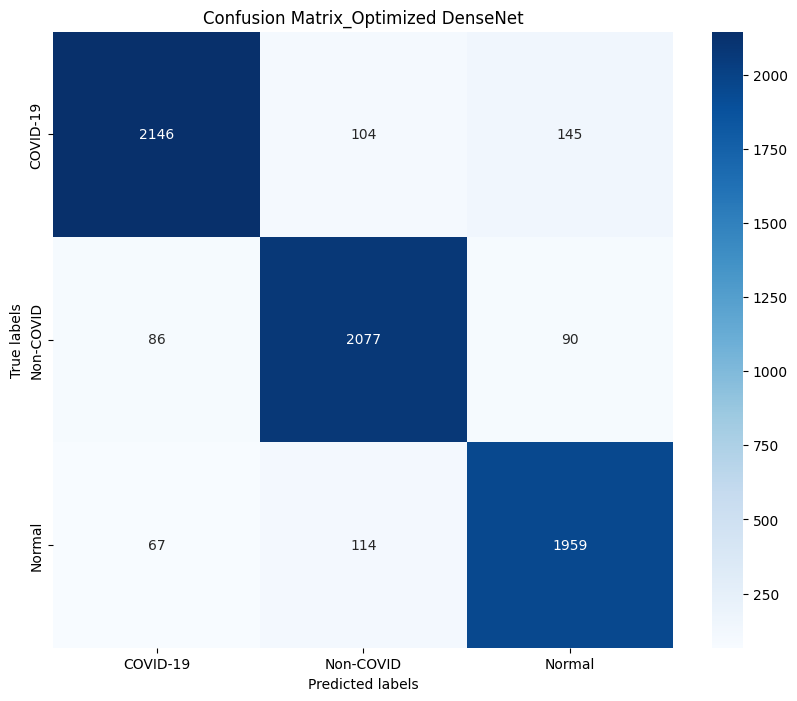

In [31]:
# Confusion_ matrix:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test data
predictions = Model_DNet_m.predict(test_generator_m)
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
# Get the true classes
true_classes = test_generator_m.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator_m.class_indices.keys(), yticklabels=test_generator_m.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_Optimized DenseNet')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


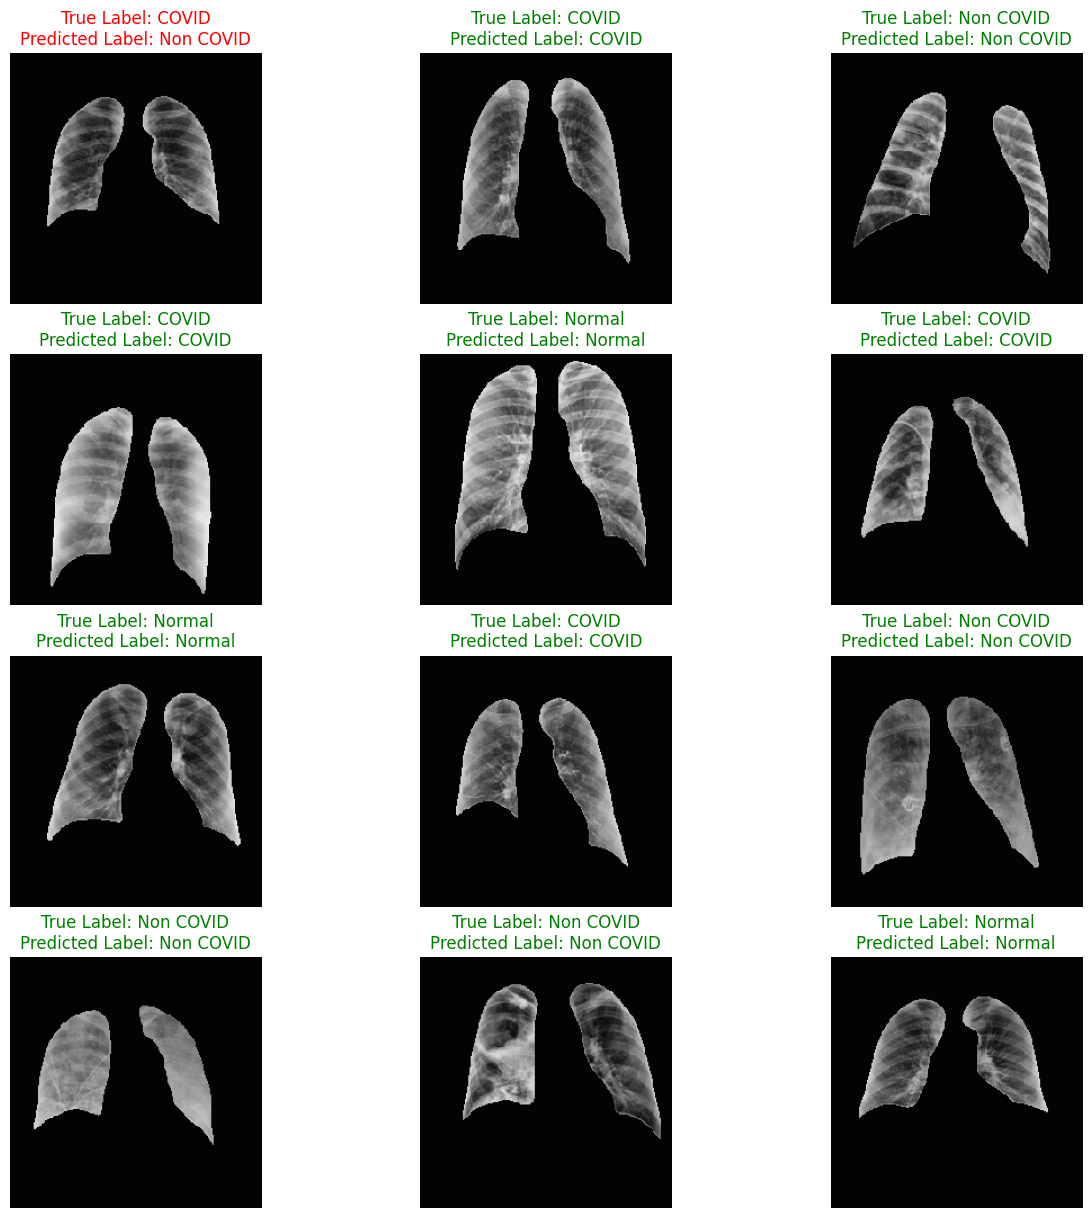

In [32]:
apply_model_and_visualize_multiple_images(Model_DNet_m, test_generator_m, num_images=12)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


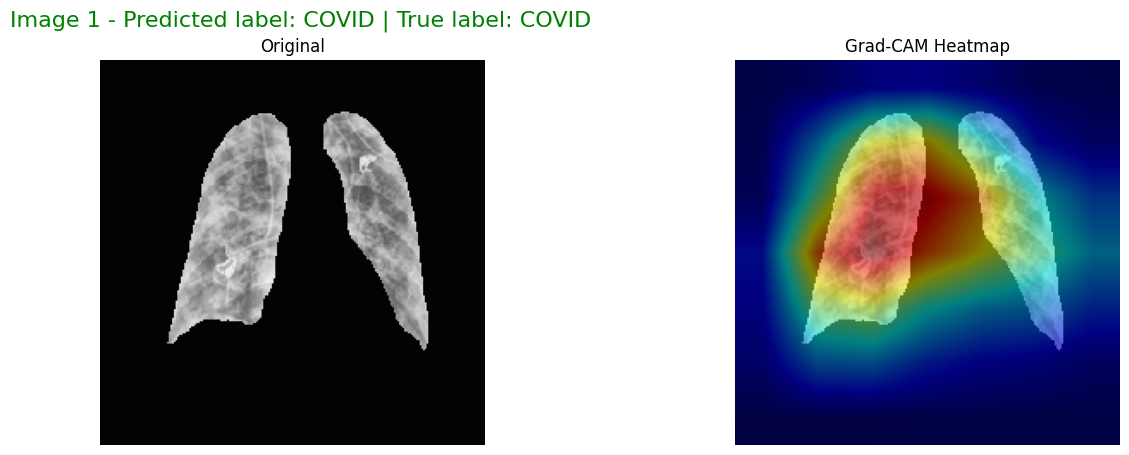

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


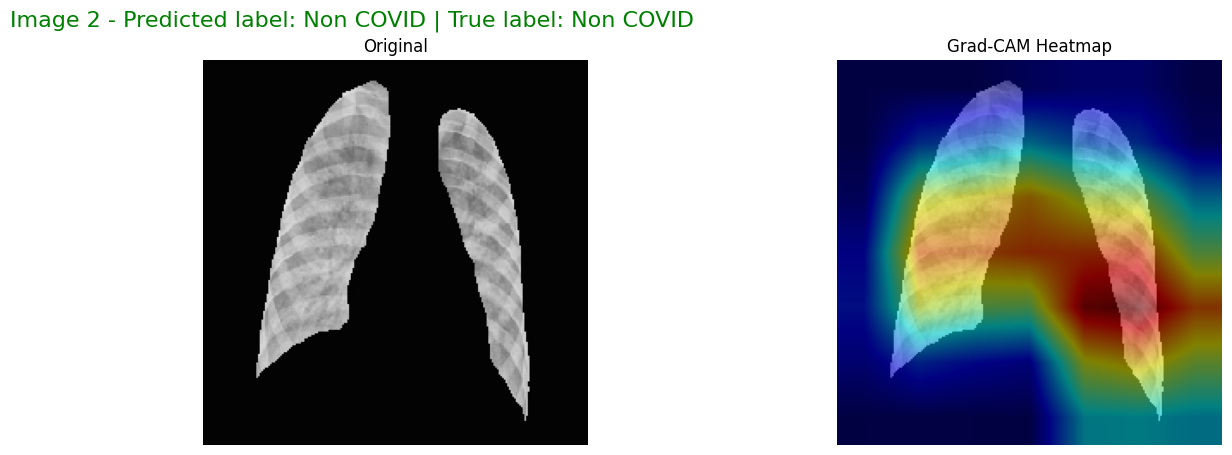

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


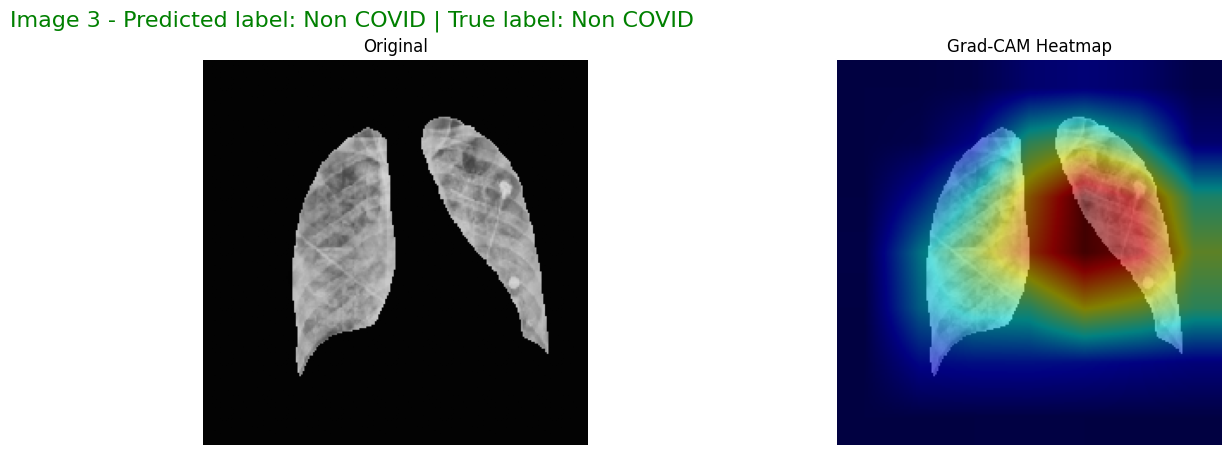

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


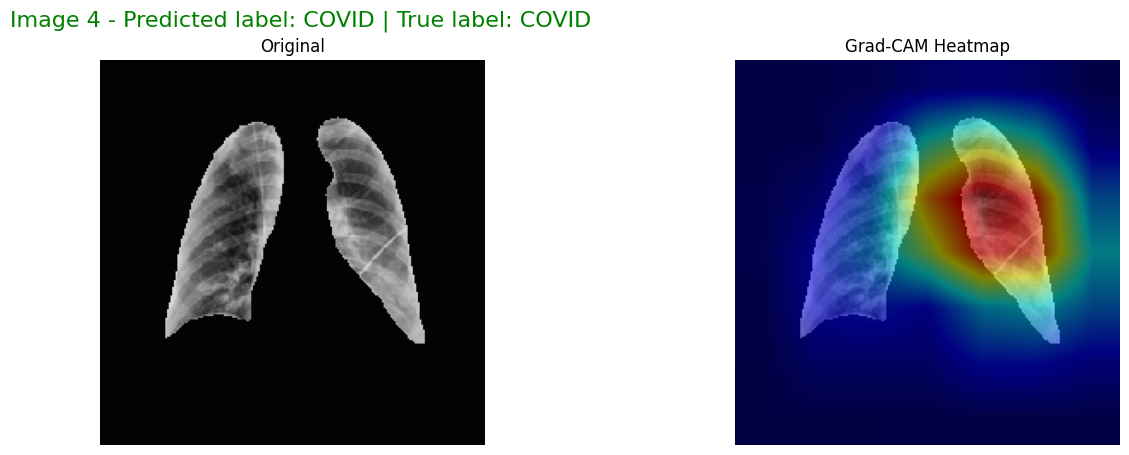

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


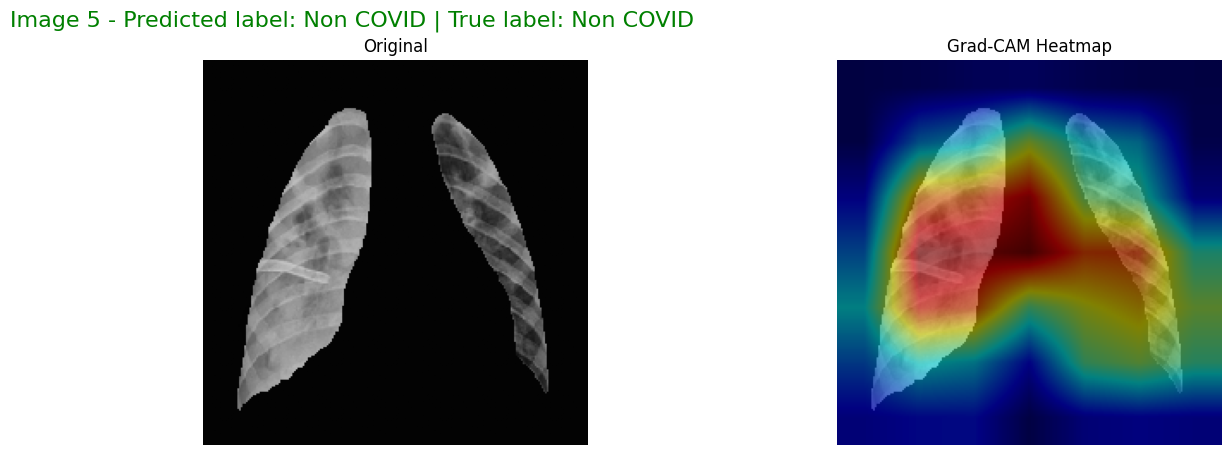

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


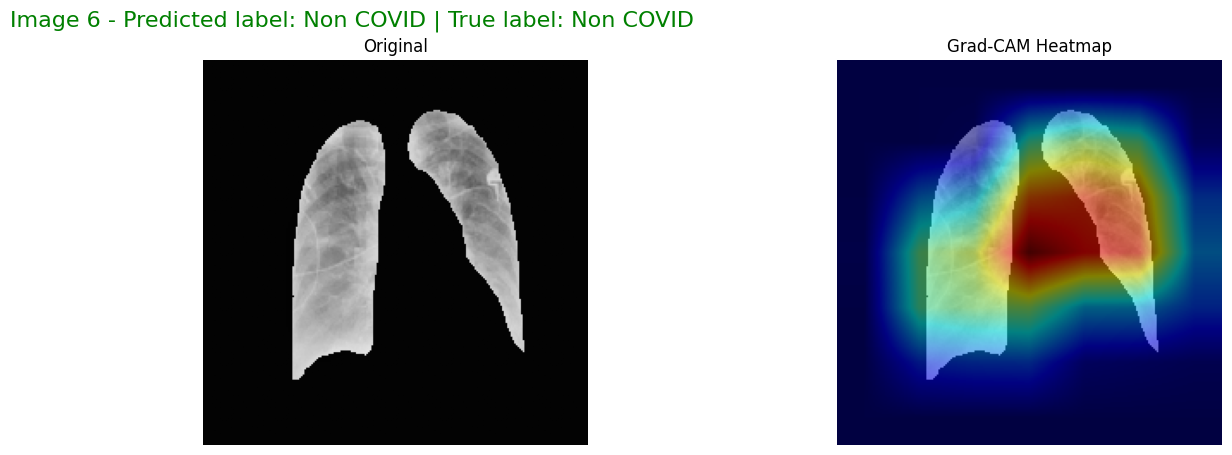

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


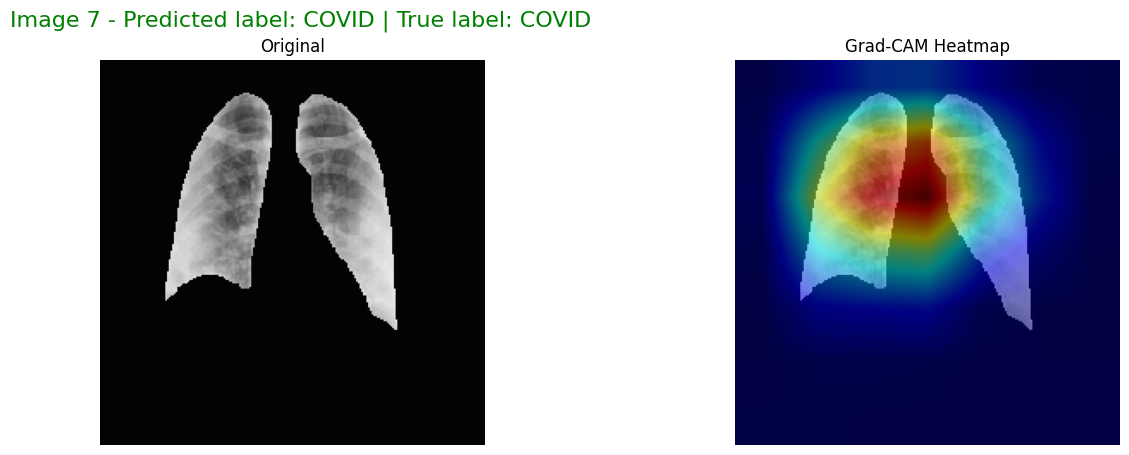

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


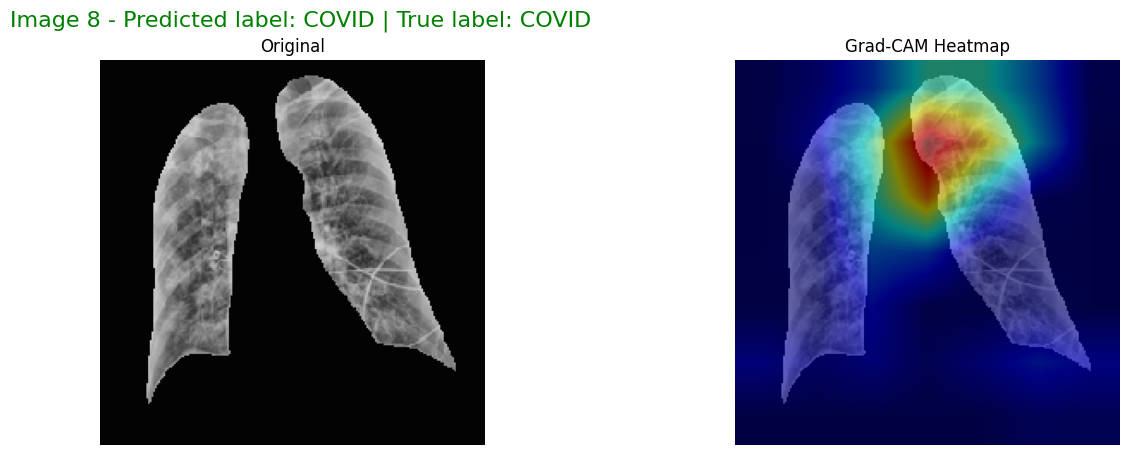

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


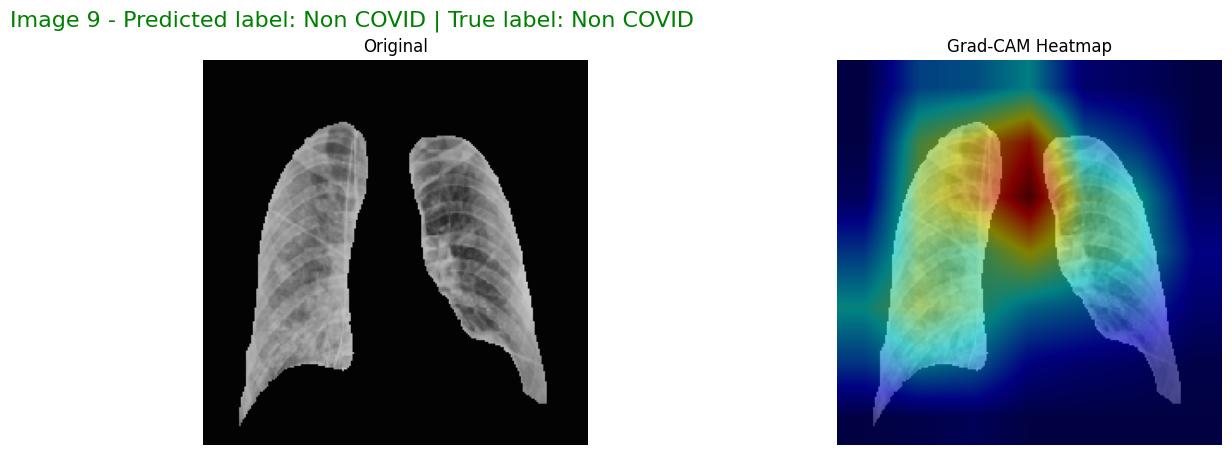

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


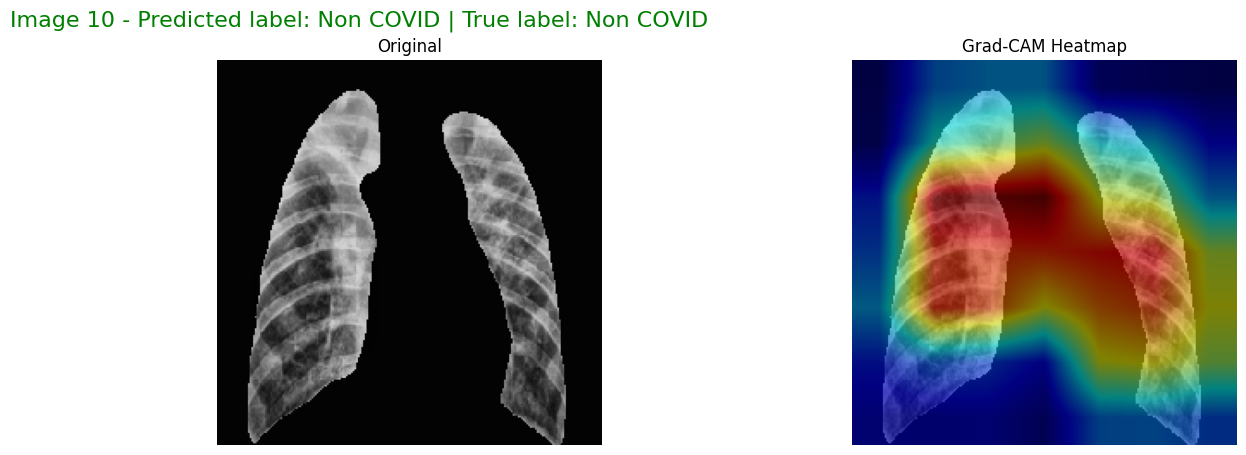

In [33]:
plot_gradcam_results (Model_DNet_m, test_generator_m, 'conv5_block32_concat')

# SAVINGS

In [34]:
#If session re-loaded or any future use of the model: 
#Model_DNet.load_weights('/kaggle/working/COVID-EX-Qu-dataset/Models/DNet_B_v0.weights.h5')

#Model saving
Model_DNet.save_weights('/kaggle/working/DNet_B_v0_image_unfreezed.weights.h5')
Model_DNet_m.save_weights('/kaggle/working/DNet_B_v0_masked_unfreezed.weights.h5')

In [ ]:
Model_DNet.save('/kaggle/working/Model_DNet_unfreezed.h5') 
Model_DNet_m.save('/kaggle/working/Model_DNet_m_unfreezed.h5')

# Conclusion

We notice that the accuracy of the model on masked images is lower than on original images (91% with masked images compared to 96% with original images). However, the model trained on masked images focuses solely on the chest region, making it more likely to interpret COVID-19 or other infections based on lung analysis rather than artifacts such as annotations, which biased the model when using original images. Therefore, it is better to use masked images for future inference activities.

Overall, this fine-tuned DenseNet201 model (from Keras) provides good performance in classification tasks.